In [ ]:
# Step 1: Download and install the TA-Lib library
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzf ta-lib-0.4.0-src.tar.gz
!cd ta-lib && ./configure --prefix=/usr && make && sudo make install

# Step 2: Install the TA-Lib Python wrapper
!pip install ta-lib

--2024-05-25 08:45:55--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-05-25 08:45:55--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://netcologne.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-05-25 08:45:55--  http://netcologne.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1
Res

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import talib as ta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

In [ ]:
# Load the dataset
file_path = '/content/BTC-USD (2).csv'
data = pd.read_csv(file_path)

data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
# Columns to add lags for
cols_to_lag = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for col in cols_to_lag:
  data[col] = pd.to_numeric(data[col])
  for lag in range(1, 8):
        data[f'{col}_lag{lag}'] = data[col].shift(lag)

data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Open_lag1,Open_lag2,Open_lag3,...,Adj Close_lag5,Adj Close_lag6,Adj Close_lag7,Volume_lag1,Volume_lag2,Volume_lag3,Volume_lag4,Volume_lag5,Volume_lag6,Volume_lag7
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,465.864014,NaN,NaN,...,NaN,NaN,NaN,21056800.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,456.859985,465.864014,NaN,...,NaN,NaN,NaN,34483200.0,21056800.0,NaN,NaN,NaN,NaN,NaN
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,424.102997,456.859985,465.864014,...,NaN,NaN,NaN,37919700.0,34483200.0,21056800.0,NaN,NaN,NaN,NaN
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,394.673004,424.102997,456.859985,...,NaN,NaN,NaN,36863600.0,37919700.0,34483200.0,21056800.0,NaN,NaN,NaN


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Open_lag1,Open_lag2,Open_lag3,...,Adj Close_lag5,Adj Close_lag6,Adj Close_lag7,Volume_lag1,Volume_lag2,Volume_lag3,Volume_lag4,Volume_lag5,Volume_lag6,Volume_lag7
2708,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051,42157.398438,42236.566406,42412.300781,...,43565.113281,44338.796875,44118.445313,2.082778e+10,1.474159e+10,1.815239e+10,2.695493e+10,3.214205e+10,2.324589e+10,3.307940e+10
2709,2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657,42586.464844,42157.398438,42236.566406,...,42407.937500,43565.113281,44338.796875,2.272166e+10,2.082778e+10,1.474159e+10,1.815239e+10,2.695493e+10,3.214205e+10,2.324589e+10
2710,2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,40538.011719,26246662813,44578.277344,42586.464844,42157.398438,...,42244.468750,42407.937500,43565.113281,1.979255e+10,2.272166e+10,2.082778e+10,1.474159e+10,1.815239e+10,2.695493e+10,3.214205e+10
2711,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704,43937.070313,44578.277344,42586.464844,...,42197.515625,42244.468750,42407.937500,2.624666e+10,1.979255e+10,2.272166e+10,2.082778e+10,1.474159e+10,1.815239e+10,2.695493e+10
2712,2022-02-19,40022.132813,40246.027344,40010.867188,40126.429688,40126.429688,22263900160,40552.132813,43937.070313,44578.277344,...,42586.917969,42197.515625,42244.468750,2.331001e+10,2.624666e+10,1.979255e+10,2.272166e+10,2.082778e+10,1.474159e+10,1.815239e+10


In [ ]:
# Save the updated dataset to a new CSV file
data.to_csv('/content/BTC-USD_with_lags.csv', index=False)


In [ ]:
# Load the dataset
file_path = '/content/BTC-USD_with_lags.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Open_lag1,Open_lag2,Open_lag3,...,Adj Close_lag5,Adj Close_lag6,Adj Close_lag7,Volume_lag1,Volume_lag2,Volume_lag3,Volume_lag4,Volume_lag5,Volume_lag6,Volume_lag7
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,465.864014,NaN,NaN,...,NaN,NaN,NaN,21056800.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,456.859985,465.864014,NaN,...,NaN,NaN,NaN,34483200.0,21056800.0,NaN,NaN,NaN,NaN,NaN
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,424.102997,456.859985,465.864014,...,NaN,NaN,NaN,37919700.0,34483200.0,21056800.0,NaN,NaN,NaN,NaN
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,394.673004,424.102997,456.859985,...,NaN,NaN,NaN,36863600.0,37919700.0,34483200.0,21056800.0,NaN,NaN,NaN


In [ ]:
# Split the dataset into training and test sets
split_ratio = 0.8
split_index = int(len(df) * split_ratio)
train_df = df[:split_index]
test_df = df[split_index:]

# Save the split datasets to CSV files
train_df.to_csv('/content/BTC-USD_train.csv', index=True)
test_df.to_csv('/content/BTC-USD_test.csv', index=True)

print("Training and test datasets saved successfully.")

Training and test datasets saved successfully.


# **Data Preprocessing**

In [ ]:
# Identify missing values
missing_values = df.isnull().sum()
missing_values

Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
Open_lag1         1
Open_lag2         2
Open_lag3         3
Open_lag4         4
Open_lag5         5
Open_lag6         6
Open_lag7         7
High_lag1         1
High_lag2         2
High_lag3         3
High_lag4         4
High_lag5         5
High_lag6         6
High_lag7         7
Low_lag1          1
Low_lag2          2
Low_lag3          3
Low_lag4          4
Low_lag5          5
Low_lag6          6
Low_lag7          7
Close_lag1        1
Close_lag2        2
Close_lag3        3
Close_lag4        4
Close_lag5        5
Close_lag6        6
Close_lag7        7
Adj Close_lag1    1
Adj Close_lag2    2
Adj Close_lag3    3
Adj Close_lag4    4
Adj Close_lag5    5
Adj Close_lag6    6
Adj Close_lag7    7
Volume_lag1       1
Volume_lag2       2
Volume_lag3       3
Volume_lag4       4
Volume_lag5       5
Volume_lag6       6
Volume_lag7       7
dtype: int64

In [ ]:
# Replace missing values with 0
df.fillna(0, inplace=True)

In [ ]:
# Handle missing values by forward filling, then back filling
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

In [ ]:
missing_values = df.isnull().sum()
missing_values

Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
Open_lag1         0
Open_lag2         0
Open_lag3         0
Open_lag4         0
Open_lag5         0
Open_lag6         0
Open_lag7         0
High_lag1         0
High_lag2         0
High_lag3         0
High_lag4         0
High_lag5         0
High_lag6         0
High_lag7         0
Low_lag1          0
Low_lag2          0
Low_lag3          0
Low_lag4          0
Low_lag5          0
Low_lag6          0
Low_lag7          0
Close_lag1        0
Close_lag2        0
Close_lag3        0
Close_lag4        0
Close_lag5        0
Close_lag6        0
Close_lag7        0
Adj Close_lag1    0
Adj Close_lag2    0
Adj Close_lag3    0
Adj Close_lag4    0
Adj Close_lag5    0
Adj Close_lag6    0
Adj Close_lag7    0
Volume_lag1       0
Volume_lag2       0
Volume_lag3       0
Volume_lag4       0
Volume_lag5       0
Volume_lag6       0
Volume_lag7       0
dtype: int64

In [ ]:
# Normalize the data
scaler = MinMaxScaler()
scaled_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'] + \
                 [f'{col}_lag{lag}' for col in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'] for lag in range(1, 8)]

df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

In [ ]:
df['SMA'] = ta.SMA(df['Close'], timeperiod=30)
df['EMA'] = ta.EMA(df['Close'], timeperiod=30)
df['RSI'] = ta.RSI(df['Close'], timeperiod=14)
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = ta.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

In [ ]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)
df.set_index('Date', inplace=True)

print(df.head())

                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2014-09-17  0.004289  0.003739  0.004243  0.004144   0.004144  0.000043   
2014-09-18  0.004155  0.003574  0.003649  0.003655   0.003655  0.000081   
2014-09-19  0.003669  0.003151  0.003217  0.003216   0.003216  0.000091   
2014-09-20  0.003232  0.003085  0.003298  0.003425   0.003425  0.000088   
2014-09-21  0.003431  0.002927  0.003348  0.003275   0.003275  0.000059   

            Open_lag1  Open_lag2  Open_lag3  Open_lag4  ...  Volume_lag4  \
Date                                                    ...                
2014-09-17   0.000000   0.000000   0.000000   0.000000  ...      0.00000   
2014-09-18   0.006897   0.000000   0.000000   0.000000  ...      0.00000   
2014-09-19   0.006763   0.006897   0.000000   0.000000  ...      0.00000   
2014-09-20   0.006278   0.006763   0.006897   0.000000  ...      0.00000   
2014-09-21   0.005

In [ ]:
# Remove any rows with NaN values generated by technical indicators
df.dropna(inplace=True)

In [ ]:
print(df.head())

                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2014-10-20  0.003152  0.002601  0.003122  0.003038   0.003038  0.000030   
2014-10-21  0.003051  0.002638  0.003161  0.003092   0.003092  0.000024   
2014-10-22  0.003105  0.002579  0.003183  0.003043   0.003043  0.000016   
2014-10-23  0.003059  0.002527  0.002793  0.002676   0.002676  0.000059   
2014-10-24  0.002697  0.002225  0.002746  0.002675   0.002675  0.000028   

            Open_lag1  Open_lag2  Open_lag3  Open_lag4  ...  Volume_lag4  \
Date                                                    ...                
2014-10-20   0.005792   0.005684   0.005666   0.005840  ...     0.000077   
2014-10-21   0.005762   0.005792   0.005684   0.005666  ...     0.000039   
2014-10-22   0.005661   0.005762   0.005792   0.005684  ...     0.000033   
2014-10-23   0.005716   0.005661   0.005762   0.005792  ...     0.000017   
2014-10-24   0.005

# **Feature Engineering**

In [ ]:
# Summary statistics
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  2680.000000  2680.000000  2680.000000  2680.000000  2680.000000   
mean      0.167258     0.168286     0.165149     0.167395     0.167395   
std       0.239850     0.241940     0.236514     0.239850     0.239850   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.006565     0.006074     0.006673     0.006586     0.006586   
50%       0.091947     0.091689     0.092302     0.091979     0.091979   
75%       0.154088     0.154423     0.152093     0.154292     0.154292   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            Volume    Open_lag1    Open_lag2    Open_lag3    Open_lag4  ...  \
count  2680.000000  2680.000000  2680.000000  2680.000000  2680.000000  ...   
mean      0.042396     0.169220     0.168998     0.168758     0.168514  ...   
std       0.057193     0.239103     0.238978     0.238818     0.238650  ...   
min       0.00000

In [ ]:
# Correlation matrix
corr_matrix = df.corr()

In [ ]:
print(corr_matrix)

                    Open      High       Low     Close  Adj Close    Volume  \
Open            1.000000  0.999533  0.999097  0.998833   0.998833  0.726878   
High            0.999533  1.000000  0.999040  0.999486   0.999486  0.730500   
Low             0.999097  0.999040  1.000000  0.999396   0.999396  0.719213   
Close           0.998833  0.999486  0.999396  1.000000   1.000000  0.725775   
Adj Close       0.998833  0.999486  0.999396  1.000000   1.000000  0.725775   
Volume          0.726878  0.730500  0.719213  0.725775   0.725775  1.000000   
Open_lag1       0.998829  0.998493  0.997776  0.997723   0.997723  0.727708   
Open_lag2       0.997723  0.997439  0.996554  0.996621   0.996621  0.726782   
Open_lag3       0.996634  0.996378  0.995443  0.995509   0.995509  0.727162   
Open_lag4       0.995529  0.995280  0.994177  0.994290   0.994290  0.727320   
Open_lag5       0.994300  0.994013  0.992971  0.993019   0.993019  0.725180   
Open_lag6       0.993028  0.992756  0.991670  0.9916

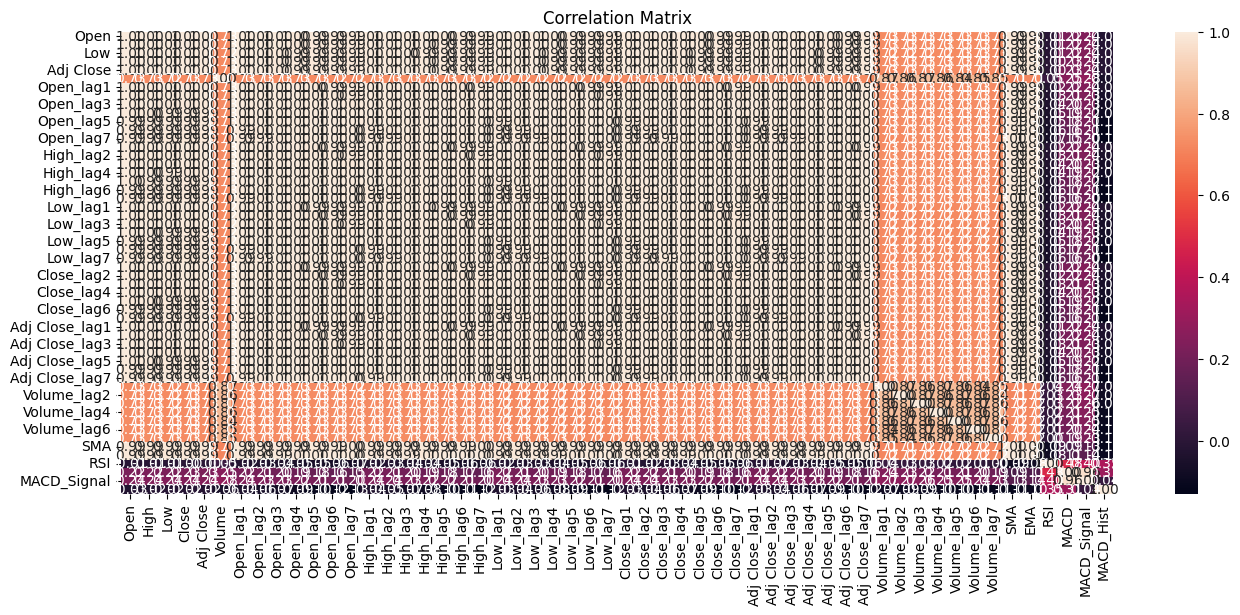

In [ ]:
# Plotting Correlation Matrix
plt.figure(figsize=(16, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

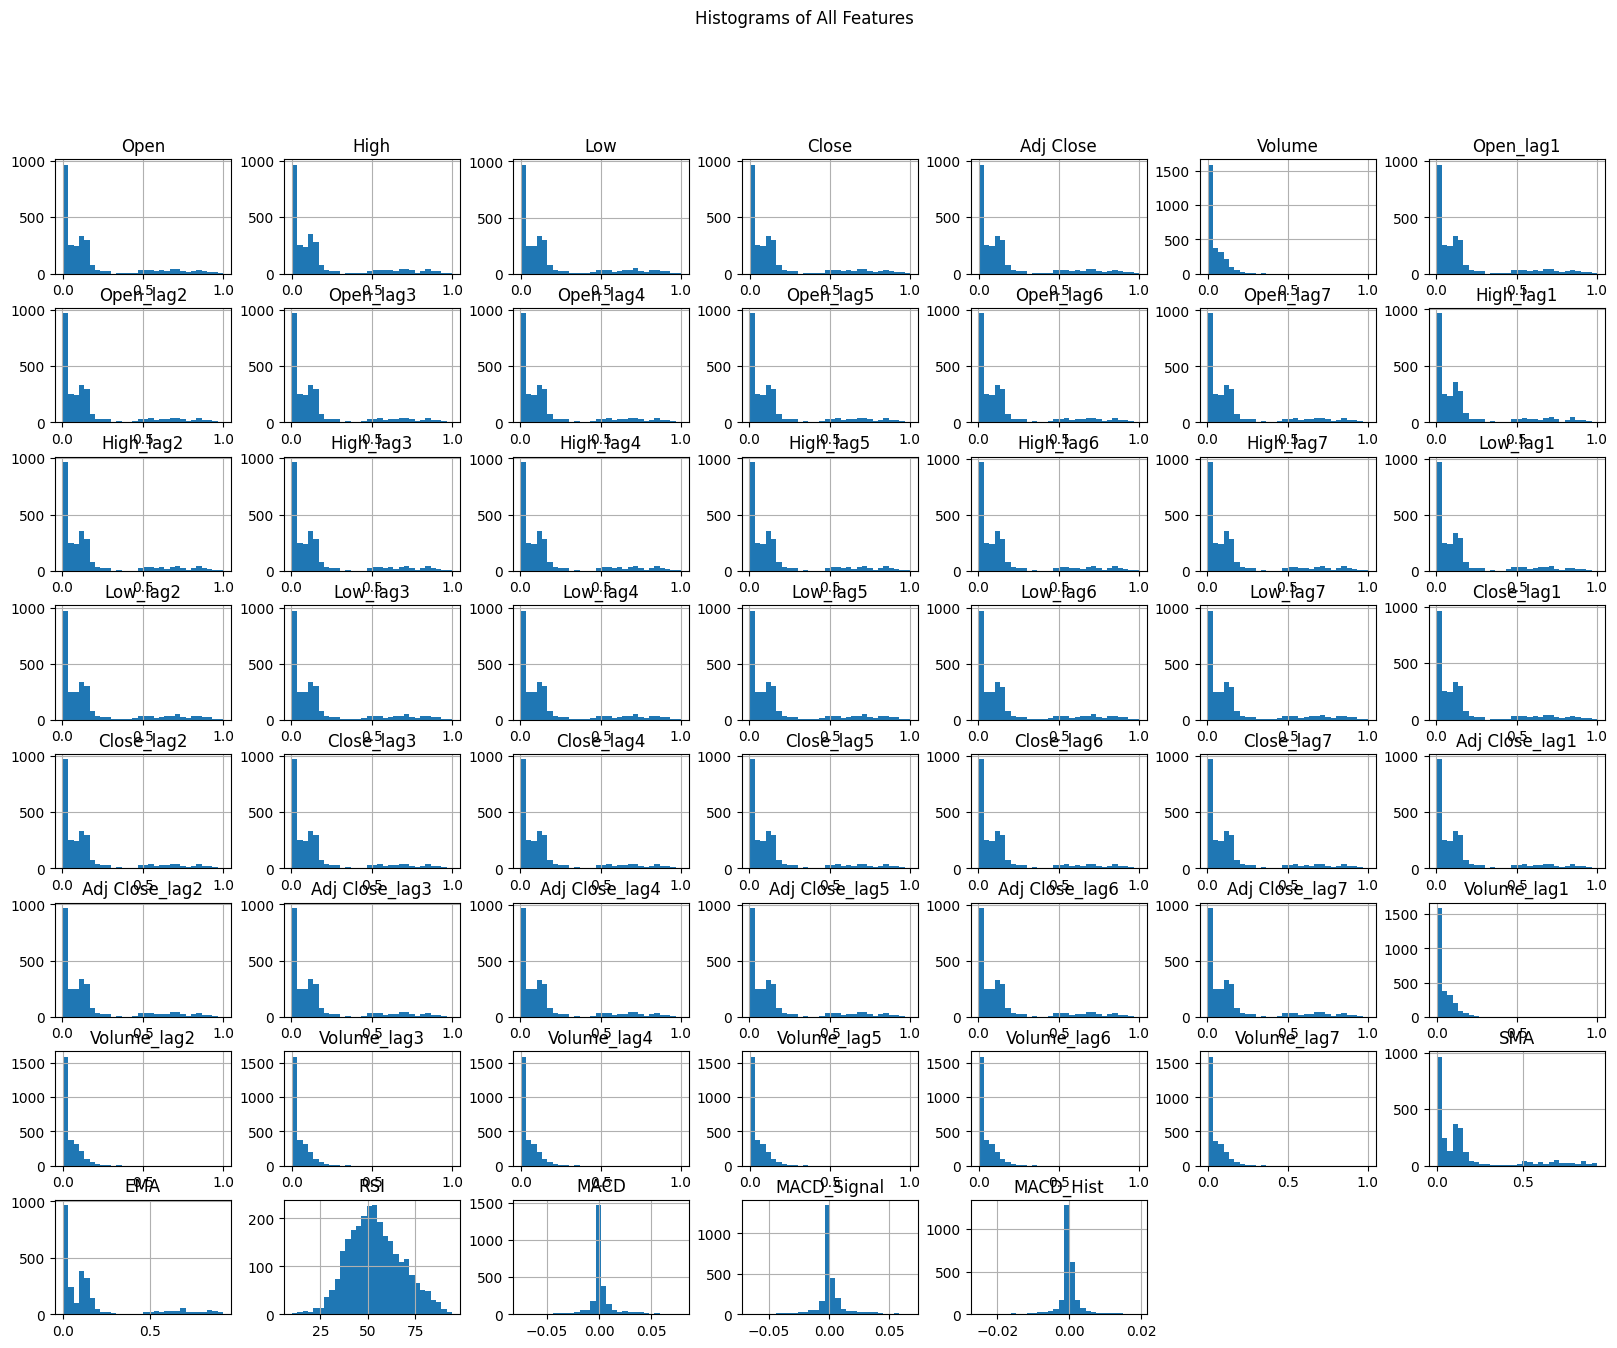

In [ ]:
# Histograms
df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of All Features')
plt.show()

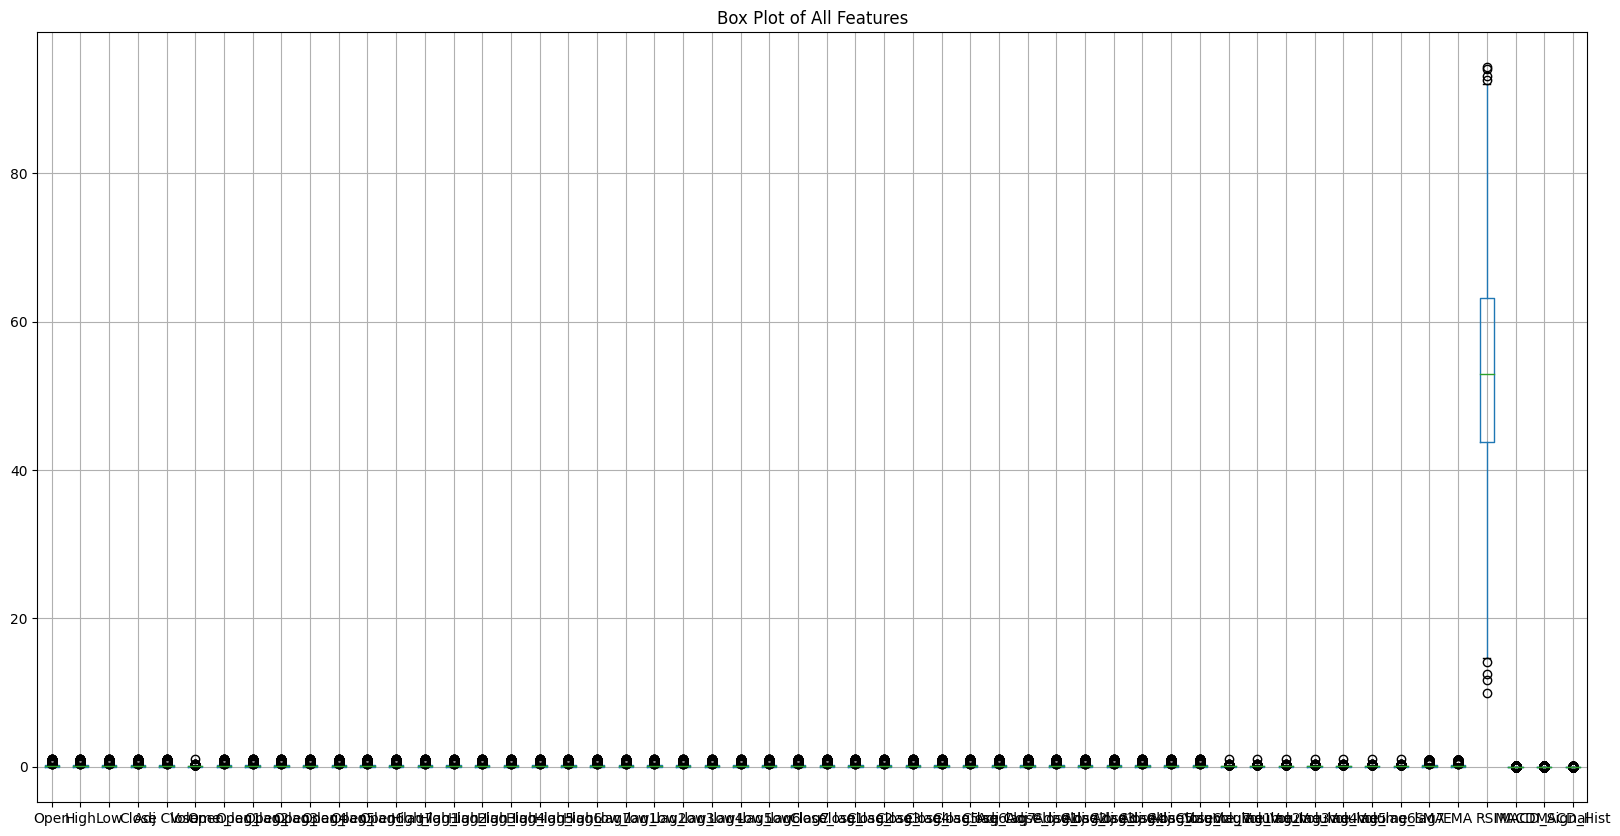

In [ ]:
# Box plots
plt.figure(figsize=(20, 10))
df.boxplot()
plt.title('Box Plot of All Features')
plt.show()

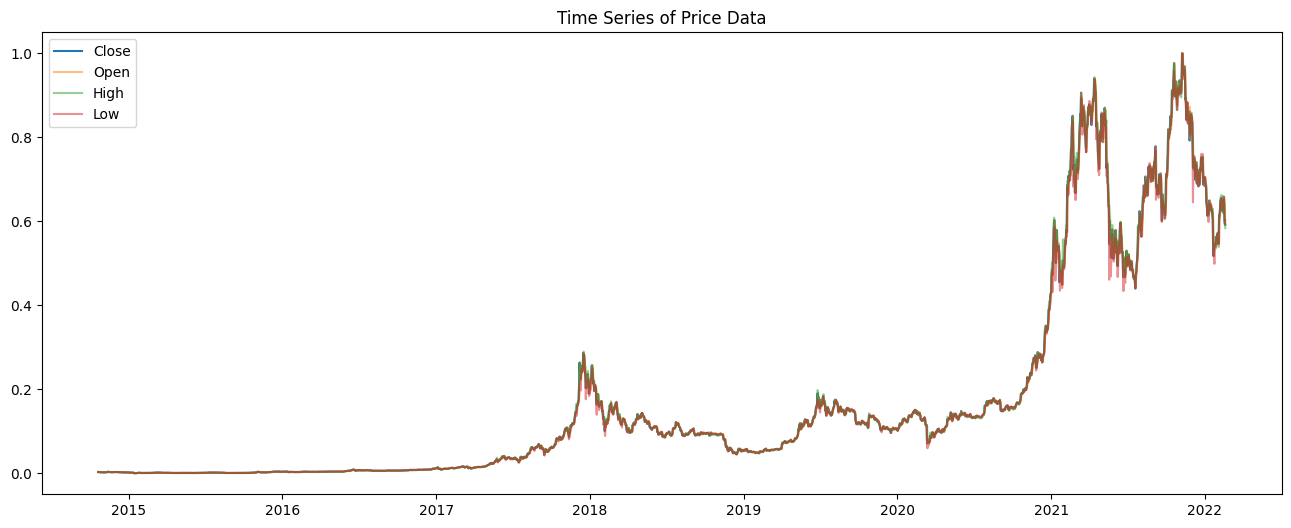

In [ ]:
# Time series plots
plt.figure(figsize=(16, 6))
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['Open'], label='Open', alpha=0.5)
plt.plot(df.index, df['High'], label='High', alpha=0.5)
plt.plot(df.index, df['Low'], label='Low', alpha=0.5)
plt.legend()
plt.title('Time Series of Price Data')
plt.show()

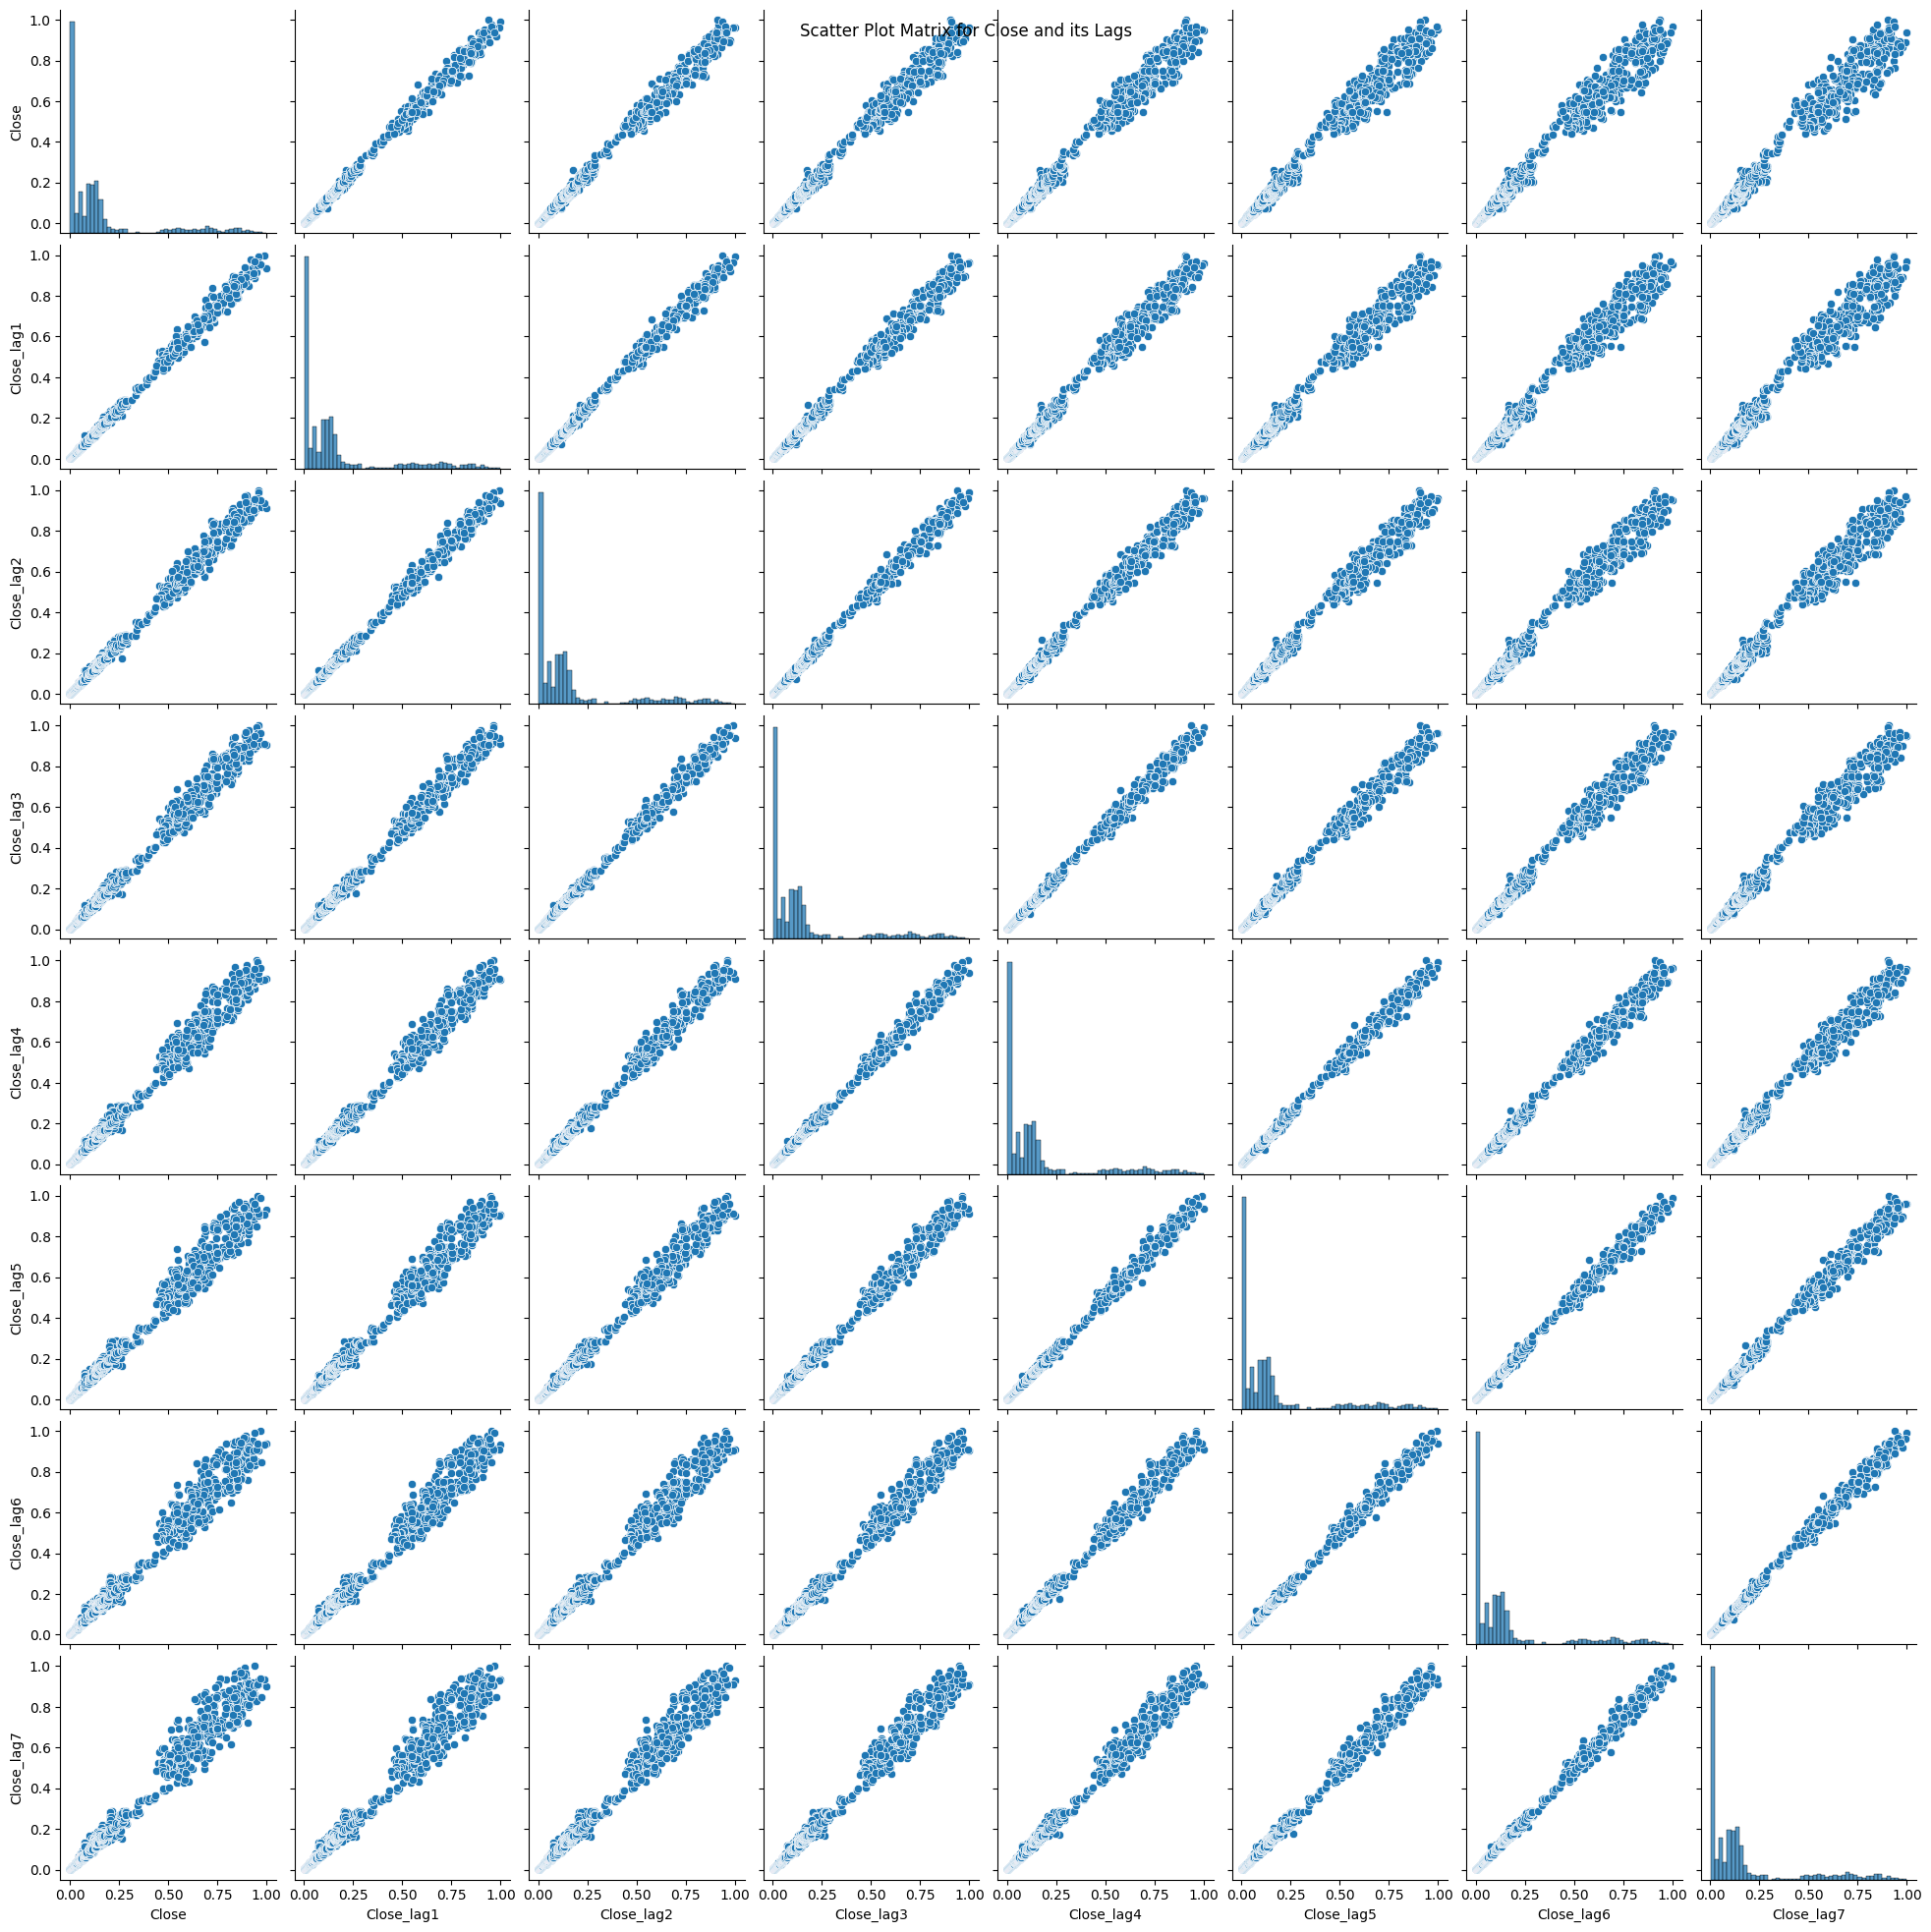

In [ ]:
# Scatter plots for some lagged features and the target variable 'Close'
sns.pairplot(df[['Close', 'Close_lag1', 'Close_lag2', 'Close_lag3', 'Close_lag4', 'Close_lag5', 'Close_lag6', 'Close_lag7']])
plt.suptitle('Scatter Plot Matrix for Close and its Lags')
plt.show()

# **Model Development**

In [ ]:
# Prepare the data for LSTM and Transformer
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [ ]:
# Define the sequence length
seq_length = 30

In [ ]:
# Select the target feature
target_feature = 'Close'

In [ ]:
# Create sequences
X, y = create_sequences(df[target_feature].values, seq_length)

In [ ]:
# Split into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2120, 30) (2120,) (530, 30) (530,)


In [ ]:
# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# LSTM model

In [ ]:
# Define the LSTM model
def create_lstm_model(input_shape, units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
# Create the LSTM model
lstm_model = create_lstm_model((seq_length, 1))

# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the LSTM model
lstm_loss = lstm_model.evaluate(X_test, y_test)
print(f'LSTM Loss: {lstm_loss}')

Epoch 1/50
53/53 [==============================] - 7s 58ms/step - loss: 5.4993e-04 - val_loss: 1.1040e-04
Epoch 2/50
53/53 [==============================] - 2s 47ms/step - loss: 1.6507e-04 - val_loss: 9.8038e-05
Epoch 3/50
53/53 [==============================] - 1s 26ms/step - loss: 1.5259e-04 - val_loss: 8.5677e-05
Epoch 4/50
53/53 [==============================] - 2s 33ms/step - loss: 1.1879e-04 - val_loss: 9.2292e-05
Epoch 5/50
53/53 [==============================] - 1s 28ms/step - loss: 1.2060e-04 - val_loss: 9.5864e-05
Epoch 6/50
53/53 [==============================] - 1s 26ms/step - loss: 1.1305e-04 - val_loss: 2.9835e-04
Epoch 7/50
53/53 [==============================] - 1s 27ms/step - loss: 1.0999e-04 - val_loss: 1.0013e-04
Epoch 8/50
53/53 [==============================] - 1s 26ms/step - loss: 9.4649e-05 - val_loss: 9.5443e-05
Epoch 9/50
53/53 [==============================] - 2s 32ms/step - loss: 9.3617e-05 - val_loss: 6.5769e-05
Epoch 10/50
53/53 [==================

In [ ]:
# Define hyperparameters for random search
units_list = [50, 100]
dropout_rate_list = [0.2, 0.3]
batch_size_list = [32, 64]
epochs_list = [50, 100]

In [ ]:
best_loss = float('inf')
best_params = None
best_model = None

In [ ]:
for units in units_list:
    for dropout_rate in dropout_rate_list:
        for batch_size in batch_size_list:
            for epochs in epochs_list:
                print(f'Training model with units={units}, dropout_rate={dropout_rate}, batch_size={batch_size}, epochs={epochs}')
                model = create_lstm_model((seq_length, 1), units, dropout_rate)
                model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
                loss = model.evaluate(X_test, y_test, verbose=0)
                print(f'Loss: {loss}')
                if loss < best_loss:
                    best_loss = loss
                    best_params = (units, dropout_rate, batch_size, epochs)
                    best_model = model

print(f'Best parameters: units={best_params[0]}, dropout_rate={best_params[1]}, batch_size={best_params[2]}, epochs={best_params[3]}')
print(f'Best loss: {best_loss}')

Training model with units=50, dropout_rate=0.2, batch_size=32, epochs=50


TypeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1917, in test_step
        y_pred = self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/lstm.py", line 616, in call
        timesteps = input_shape[0] if self.time_major else input_shape[1]

    TypeError: Exception encountered when calling layer 'lstm_6' (type LSTM).
    
    'NoneType' object is not subscriptable
    
    Call arguments received by layer 'lstm_6' (type LSTM):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • mask=None
      • training=False
      • initial_state=None


In [ ]:
from tensorflow.keras.models import load_model

lstm_model_path = 'best_lstm_model.h5'
best_model.save(lstm_model_path)
print(f'LSTM model saved to {lstm_model_path}')

LSTM model saved to best_lstm_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the best LSTM model
lstm_model_path="/content/best_lstm_model.h5"
loaded_lstm_model = load_model(lstm_model_path)
print('LSTM model loaded successfully')

LSTM model loaded successfully


# Transformer model

In [ ]:
# Define the Transformer model
def create_transformer_model(input_shape, head_size=256, num_heads=4, ff_dim=4, num_transformer_blocks=4, dropout=0.2, mlp_units=[128]):
    inputs = Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads)(x, x)
        x = Dropout(dropout)(x)
        x = LayerNormalization(epsilon=1e-6)(x)
        x = tf.keras.layers.Dense(ff_dim, activation="relu")(x)
        x = Dropout(dropout)(x)
        x = LayerNormalization(epsilon=1e-6)(x)
    x = tf.keras.layers.GlobalAveragePooling1D()(x)
    for dim in mlp_units:
        x = tf.keras.layers.Dense(dim, activation="relu")(x)
        x = Dropout(dropout)(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
transformer_model = create_transformer_model((seq_length, 1))

In [ ]:
# Train the models
transformer_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
53/53 [==============================] - 25s 320ms/step - loss: 0.0038 - val_loss: 0.0087
Epoch 2/50
53/53 [==============================] - 17s 315ms/step - loss: 0.0031 - val_loss: 0.0076
Epoch 3/50
53/53 [==============================] - 16s 308ms/step - loss: 0.0031 - val_loss: 0.0079
Epoch 4/50
53/53 [==============================] - 18s 333ms/step - loss: 0.0031 - val_loss: 0.0077
Epoch 5/50
53/53 [==============================] - 17s 321ms/step - loss: 0.0031 - val_loss: 0.0076
Epoch 6/50
53/53 [==============================] - 16s 299ms/step - loss: 0.0031 - val_loss: 0.0078
Epoch 7/50
53/53 [==============================] - 16s 297ms/step - loss: 0.0031 - val_loss: 0.0073
Epoch 8/50
53/53 [==============================] - 17s 319ms/step - loss: 0.0031 - val_loss: 0.0073
Epoch 9/50
53/53 [==============================] - 16s 297ms/step - loss: 0.0031 - val_loss: 0.0078
Epoch 10/50
53/53 [==============================] - 18s 343ms/step - loss: 0.0031 - val_lo

# **Evaluation**

# Step 1: Evaluate the Model

In [ ]:
# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mae, mse, rmse, predictions

In [ ]:
# Evaluate the loaded LSTM model
lstm_mae, lstm_mse, lstm_rmse, lstm_predictions = evaluate_model(loaded_lstm_model, X_test, y_test)
print(f'LSTM Model Evaluation:\nMAE: {lstm_mae}\nMSE: {lstm_mse}\nRMSE: {lstm_rmse}')


17/17 [==============================] - 1s 10ms/step
LSTM Model Evaluation:
MAE: 0.04821405681703058
MSE: 0.003756377404120726
RMSE: 0.06128929273633957


In [ ]:
# Define a function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Convert predictions and true values to DataFrame
    df_eval = pd.DataFrame({'True': y_test, 'Predicted': y_pred.flatten()})
    df_eval['Date'] = df.index[-len(y_test):]  # assuming y_test is the last part of df

    # Trading strategy: buy if predicted price for next day is higher than current price, otherwise sell
    df_eval['Return'] = np.where(df_eval['Predicted'].shift(-1) > df_eval['True'], df_eval['True'].pct_change(), -df_eval['True'].pct_change())
    df_eval['Cumulative_Return'] = (1 + df_eval['Return']).cumprod() - 1

    # Calculate profitability
    total_return = df_eval['Cumulative_Return'].iloc[-1]
    mean_return = df_eval['Return'].mean()
    std_return = df_eval['Return'].std()

    return mae, rmse, total_return, mean_return, std_return, df_eval

In [ ]:
# Evaluate the loaded LSTM model
mae, rmse, total_return, mean_return, std_return, df_eval = evaluate_model(loaded_lstm_model, X_test, y_test)

print(f'LSTM Model Evaluation:')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Total Return: {total_return}')
print(f'Mean Return: {mean_return}')
print(f'Standard Deviation of Return: {std_return}')

17/17 [==============================] - 0s 11ms/step
LSTM Model Evaluation:
Mean Absolute Error (MAE): 0.04821405681703058
Root Mean Squared Error (RMSE): 0.06128929273633957
Total Return: -0.9716648717455479
Mean Return: -0.005949888213675062
Standard Deviation of Return: 0.038705516192766534


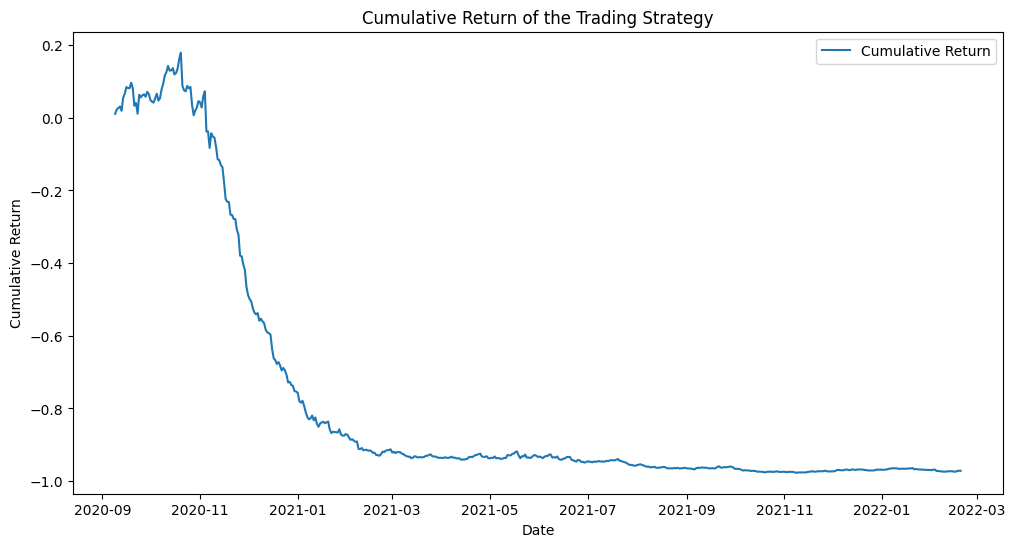

In [ ]:
# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(df_eval['Date'], df_eval['Cumulative_Return'], label='Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return of the Trading Strategy')
plt.legend()
plt.show()

# **Evaluation**

In [ ]:
# Function to create sequences for the LSTM model
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Separate test dataset for evaluation

In [ ]:
test_file_path = '/content/BTC-USD_test.csv'
test_df = pd.read_csv(test_file_path)

In [ ]:
# Convert 'Date' column to datetime and set it as index
test_df['Date'] = pd.to_datetime(test_df['Date'], errors='coerce')
test_df.set_index('Date', inplace=True)
test_df.fillna(0, inplace=True)

In [ ]:
# Identify missing values
missing_values = test_df.isnull().sum()
missing_values

Unnamed: 0        0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
Open_lag1         0
Open_lag2         0
Open_lag3         0
Open_lag4         0
Open_lag5         0
Open_lag6         0
Open_lag7         0
High_lag1         0
High_lag2         0
High_lag3         0
High_lag4         0
High_lag5         0
High_lag6         0
High_lag7         0
Low_lag1          0
Low_lag2          0
Low_lag3          0
Low_lag4          0
Low_lag5          0
Low_lag6          0
Low_lag7          0
Close_lag1        0
Close_lag2        0
Close_lag3        0
Close_lag4        0
Close_lag5        0
Close_lag6        0
Close_lag7        0
Adj Close_lag1    0
Adj Close_lag2    0
Adj Close_lag3    0
Adj Close_lag4    0
Adj Close_lag5    0
Adj Close_lag6    0
Adj Close_lag7    0
Volume_lag1       0
Volume_lag2       0
Volume_lag3       0
Volume_lag4       0
Volume_lag5       0
Volume_lag6       0
Volume_lag7       0
dtype: int64

In [ ]:
test_df.head()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,Open_lag1,Open_lag2,Open_lag3,...,Adj Close_lag5,Adj Close_lag6,Adj Close_lag7,Volume_lag1,Volume_lag2,Volume_lag3,Volume_lag4,Volume_lag5,Volume_lag6,Volume_lag7
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-26,2170,11366.894531,11530.052734,11296.993164,11488.363281,11488.363281,22466660958,11773.588867,11663.689453,11679.696289,...,11592.489258,11878.372070,11758.283203,2.630151e+10,2.068151e+10,1.848206e+10,2.022419e+10,2.376243e+10,2.017524e+10,2.450285e+10
2020-08-27,2171,11485.608398,11570.786133,11185.941406,11323.397461,11323.397461,23240415076,11366.894531,11773.588867,11663.689453,...,11681.825195,11592.489258,11878.372070,2.246666e+10,2.630151e+10,2.068151e+10,1.848206e+10,2.022419e+10,2.376243e+10,2.017524e+10
2020-08-28,2172,11325.295898,11545.615234,11316.422852,11542.500000,11542.500000,19807127588,11485.608398,11366.894531,11773.588867,...,11664.847656,11681.825195,11592.489258,2.324042e+10,2.246666e+10,2.630151e+10,2.068151e+10,1.848206e+10,2.022419e+10,2.376243e+10
2020-08-29,2173,11541.054688,11585.640625,11466.292969,11506.865234,11506.865234,17485597759,11325.295898,11485.608398,11366.894531,...,11774.595703,11664.847656,11681.825195,1.980713e+10,2.324042e+10,2.246666e+10,2.630151e+10,2.068151e+10,1.848206e+10,2.022419e+10
2020-08-30,2174,11508.713867,11715.264648,11492.381836,11711.505859,11711.505859,19760127945,11541.054688,11325.295898,11485.608398,...,11366.134766,11774.595703,11664.847656,1.748560e+10,1.980713e+10,2.324042e+10,2.246666e+10,2.630151e+10,2.068151e+10,1.848206e+10


In [ ]:
# Normalize the data
scaler = MinMaxScaler()
scaled_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'] + \
                 [f'{col}_lag{lag}' for col in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'] for lag in range(1, 8)]

test_df[scaled_columns] = scaler.fit_transform(test_df[scaled_columns])

In [ ]:
# Function to create sequences for the LSTM model
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [ ]:
# Define the sequence length
seq_length = 30
target_feature = 'Close'

In [ ]:
# Create sequences from the test data
X_test, y_test = create_sequences(test_df[target_feature].values, seq_length)

In [ ]:
# Load the best LSTM model
lstm_model_path = "/content/best_lstm_model.h5"
loaded_lstm_model = load_model(lstm_model_path)

In [ ]:
# Define a function to evaluate model performance
def evaluate_model(model, X_test, y_test, df):
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Convert predictions and true values to DataFrame
    df_eval = pd.DataFrame({'True': y_test, 'Predicted': y_pred.flatten()})
    df_eval['Date'] = df.index[-len(y_test):]  # assuming y_test is the last part of df

    # Trading strategy: buy if predicted price for next day is higher than current price, otherwise sell
    df_eval['Return'] = np.where(df_eval['Predicted'].shift(-1) > df_eval['True'], df_eval['True'].pct_change(), -df_eval['True'].pct_change())

    # Remove any NaN or infinite values in returns
    df_eval['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df_eval.dropna(subset=['Return'], inplace=True)

    # Calculate cumulative return
    df_eval['Cumulative_Return'] = (1 + df_eval['Return']).cumprod() - 1

    # Remove any NaN or infinite values in cumulative return
    df_eval['Cumulative_Return'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df_eval.dropna(subset=['Cumulative_Return'], inplace=True)

    # Calculate profitability
    total_return = df_eval['Cumulative_Return'].iloc[-1] if not df_eval.empty else 0
    mean_return = df_eval['Return'].mean() if not df_eval.empty else 0
    std_return = df_eval['Return'].std() if not df_eval.empty else 0

    return mae, rmse, total_return, mean_return, std_return, df_eval

In [ ]:
# Evaluate the loaded LSTM model
mae, rmse, total_return, mean_return, std_return, df_eval = evaluate_model(loaded_lstm_model, X_test, y_test, test_df)

print(f'LSTM Model Evaluation:')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Total Return: {total_return}')
print(f'Mean Return: {mean_return}')
print(f'Standard Deviation of Return: {std_return}')


17/17 [==============================] - 1s 9ms/step
LSTM Model Evaluation:
Mean Absolute Error (MAE): 0.045361778470586936
Root Mean Squared Error (RMSE): 0.0591489026005875
Total Return: -0.9999073275565654
Mean Return: -0.015120315252026815
Standard Deviation of Return: 0.07319597813258195


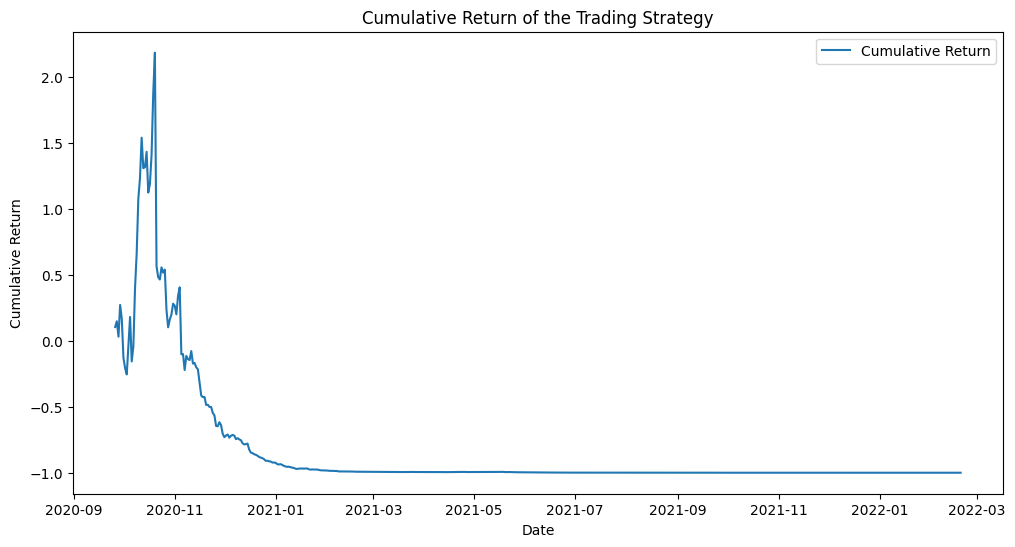

In [ ]:
# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(df_eval['Date'], df_eval['Cumulative_Return'], label='Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return of the Trading Strategy')
plt.legend()
plt.show()